In [27]:
import requests
import time
import pandas as pd
import ipaddress
#modules needed
import folium
import random
import matplotlib.colors as mcolors
# visualizacion 
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go
#pio.renderers
#pio.renderers.default = 'notebook_connected'
pio.renderers.default='iframe'
import ipywidgets as widgets
from IPython.display import display, clear_output


from dotenv import load_dotenv
import os
load_dotenv()

True

# EXPLORAR AS31898 - Oracle Corporation São Paulo - BRAZIL

## 'dst_addr': '152.67.47.248'

In [29]:
def is_bogon(ip):
    """Check if an IP address is part of a bogon network."""
    bogon_networks = [
        ipaddress.ip_network('0.0.0.0/8'),       # "This" Network
        ipaddress.ip_network('10.0.0.0/8'),      # Private-Use Networks
        ipaddress.ip_network('100.64.0.0/10'),   # Shared Address Space
        ipaddress.ip_network('127.0.0.0/8'),     # Loopback
        ipaddress.ip_network('169.254.0.0/16'),  # Link Local
        ipaddress.ip_network('172.16.0.0/12'),   # Private-Use Networks
        ipaddress.ip_network('192.0.0.0/24'),    # IETF Protocol Assignments
        ipaddress.ip_network('192.0.2.0/24'),    # TEST-NET-1
        ipaddress.ip_network('192.168.0.0/16'),  # Private-Use Networks
        ipaddress.ip_network('198.18.0.0/15'),   # Network Interconnect Device Benchmark Testing
        ipaddress.ip_network('198.51.100.0/24'), # TEST-NET-2
        ipaddress.ip_network('203.0.113.0/24'),  # TEST-NET-3
        ipaddress.ip_network('224.0.0.0/4'),     # Multicast
        ipaddress.ip_network('240.0.0.0/4'),     # Reserved for Future Use
        ipaddress.ip_network('255.255.255.255/32') # Broadcast
    ]

    
    ip_addr = ipaddress.ip_address(ip)
    for network in bogon_networks:
        if ip_addr in network:
            return True
    return False

In [30]:
base_url="https://atlas.ripe.net/api/v2"
api_key= os.getenv("API_KEY")
mst_id = "117967529"
results_url = f"{base_url}/measurements/{mst_id}/results/"
headers = {"Authorization": f"Key {api_key}"}
response = requests.get(results_url, headers=headers)
results_data = response.json()


In [32]:
results_data[8]

{'fw': 5080,
 'mver': '2.6.3',
 'lts': 32,
 'endtime': 1752637129,
 'dst_name': '152.67.47.248',
 'dst_addr': '152.67.47.248',
 'src_addr': '10.90.27.2',
 'proto': 'ICMP',
 'af': 4,
 'size': 48,
 'paris_id': 1,
 'result': [{'hop': 1,
   'result': [{'from': '10.90.27.1', 'ttl': 64, 'size': 76, 'rtt': 1.058},
    {'from': '10.90.27.1', 'ttl': 64, 'size': 76, 'rtt': 0.302},
    {'from': '10.90.27.1', 'ttl': 64, 'size': 76, 'rtt': 0.265}]},
  {'hop': 2,
   'result': [{'from': '190.216.97.224', 'ttl': 63, 'size': 76, 'rtt': 1.792},
    {'from': '190.216.97.224', 'ttl': 63, 'size': 76, 'rtt': 0.883},
    {'from': '190.216.97.224', 'ttl': 63, 'size': 76, 'rtt': 0.819}]},
  {'hop': 3,
   'result': [{'from': '200.189.213.22',
     'ttl': 243,
     'size': 28,
     'rtt': 131.174},
    {'from': '200.189.213.22', 'ttl': 243, 'size': 28, 'rtt': 130.873},
    {'from': '200.189.213.22', 'ttl': 243, 'size': 28, 'rtt': 130.905}]},
  {'hop': 4,
   'result': [{'from': '8.243.148.238',
     'ttl': 243,
 

In [6]:
type(results_data)

list

In [7]:
len(results_data)

23

In [33]:
df = pd.DataFrame(results_data)

In [34]:
df

,fw,mver,lts,endtime,dst_name,dst_addr,src_addr,proto,af,size,...,result,destination_ip_responded,msm_id,prb_id,timestamp,msm_name,from,type,group_id,stored_timestamp
0,5090,2.6.4,213,1752637143,152.67.47.248,152.67.47.248,131.72.76.118,ICMP,4,48,...,"[{'hop': 1, 'result': [{'from': '131.72.76.117...",True,117967529,6393,1752637128,Traceroute,131.72.76.118,traceroute,117967529,1752637143
1,5080,2.6.2,4,1752637144,152.67.47.248,152.67.47.248,192.168.40.4,ICMP,4,48,...,"[{'hop': 1, 'result': [{'from': '192.168.40.1'...",True,117967529,1007159,1752637125,Traceroute,66.9.168.199,traceroute,117967529,1752637147
2,5080,2.6.2,18,1752637140,152.67.47.248,152.67.47.248,192.168.1.23,ICMP,4,48,...,"[{'hop': 1, 'result': [{'from': '192.168.1.1',...",True,117967529,65443,1752637127,Traceroute,152.173.203.239,traceroute,117967529,1752637141
3,4790,NaN,58,1752637132,152.67.47.248,152.67.47.248,10.0.5.113,ICMP,4,48,...,"[{'hop': 1, 'result': [{'from': '10.0.5.1', 't...",True,117967529,1194,1752637129,Traceroute,67.172.131.23,traceroute,117967529,1752637149
4,5080,2.6.2,11,1752637154,152.67.47.248,152.67.47.248,192.168.1.119,ICMP,4,48,...,"[{'hop': 1, 'result': [{'from': '192.168.1.1',...",True,117967529,51297,1752637128,Traceroute,38.253.154.70,traceroute,117967529,1752637154
5,5080,2.6.2,58,1752637139,152.67.47.248,152.67.47.248,192.168.10.191,ICMP,4,48,...,"[{'hop': 1, 'result': [{'from': '192.168.10.1'...",True,117967529,23526,1752637126,Traceroute,186.53.81.223,traceroute,117967529,1752637141
6,5080,2.6.2,34,1752637129,152.67.47.248,152.67.47.248,200.10.228.49,ICMP,4,48,...,"[{'hop': 1, 'result': [{'from': '200.10.228.12...",True,117967529,16576,1752637128,Traceroute,200.10.228.49,traceroute,117967529,1752637131
7,5100,2.6.4,14,1752637129,152.67.47.248,152.67.47.248,192.168.99.249,ICMP,4,48,...,"[{'hop': 1, 'result': [{'from': '192.168.99.30...",True,117967529,1009776,1752637127,Traceroute,186.121.201.194,traceroute,117967529,1752637130
8,5080,2.6.3,32,1752637129,152.67.47.248,152.67.47.248,10.90.27.2,ICMP,4,48,...,"[{'hop': 1, 'result': [{'from': '10.90.27.1', ...",True,117967529,1010236,1752637127,Traceroute,45.233.102.1,traceroute,117967529,1752637130
9,5090,2.6.4,37,1752637137,152.67.47.248,152.67.47.248,45.68.42.34,ICMP,4,48,...,"[{'hop': 1, 'result': [{'from': '45.68.42.1', ...",True,117967529,7390,1752637127,Traceroute,45.68.42.34,traceroute,117967529,1752637138


In [35]:
results_data[1]

{'fw': 5080,
 'mver': '2.6.2',
 'lts': 4,
 'endtime': 1752637144,
 'dst_name': '152.67.47.248',
 'dst_addr': '152.67.47.248',
 'src_addr': '192.168.40.4',
 'proto': 'ICMP',
 'af': 4,
 'size': 48,
 'paris_id': 1,
 'result': [{'hop': 1,
   'result': [{'from': '192.168.40.1', 'ttl': 64, 'size': 76, 'rtt': 0.441},
    {'from': '192.168.40.1', 'ttl': 64, 'size': 76, 'rtt': 0.304},
    {'from': '192.168.40.1', 'ttl': 64, 'size': 76, 'rtt': 0.285}]},
  {'hop': 2,
   'result': [{'from': '100.64.0.1', 'ttl': 253, 'size': 76, 'rtt': 30.189},
    {'from': '100.64.0.1', 'ttl': 253, 'size': 76, 'rtt': 26.001},
    {'from': '100.64.0.1', 'ttl': 253, 'size': 76, 'rtt': 31.144}]},
  {'hop': 3,
   'result': [{'from': '172.16.250.92', 'ttl': 62, 'size': 76, 'rtt': 29.109},
    {'from': '172.16.250.92', 'ttl': 62, 'size': 76, 'rtt': 31.078},
    {'from': '172.16.250.92', 'ttl': 62, 'size': 76, 'rtt': 30.635}]},
  {'hop': 4,
   'result': [{'from': '206.224.67.222',
     'ttl': 249,
     'size': 140,
     

In [36]:
results_data[1]['result']


[{'hop': 1,
  'result': [{'from': '192.168.40.1', 'ttl': 64, 'size': 76, 'rtt': 0.441},
   {'from': '192.168.40.1', 'ttl': 64, 'size': 76, 'rtt': 0.304},
   {'from': '192.168.40.1', 'ttl': 64, 'size': 76, 'rtt': 0.285}]},
 {'hop': 2,
  'result': [{'from': '100.64.0.1', 'ttl': 253, 'size': 76, 'rtt': 30.189},
   {'from': '100.64.0.1', 'ttl': 253, 'size': 76, 'rtt': 26.001},
   {'from': '100.64.0.1', 'ttl': 253, 'size': 76, 'rtt': 31.144}]},
 {'hop': 3,
  'result': [{'from': '172.16.250.92', 'ttl': 62, 'size': 76, 'rtt': 29.109},
   {'from': '172.16.250.92', 'ttl': 62, 'size': 76, 'rtt': 31.078},
   {'from': '172.16.250.92', 'ttl': 62, 'size': 76, 'rtt': 30.635}]},
 {'hop': 4,
  'result': [{'from': '206.224.67.222',
    'ttl': 249,
    'size': 140,
    'rtt': 27.05,
    'icmpext': {'version': 2,
     'rfc4884': 1,
     'obj': [{'class': 1,
       'type': 1,
       'mpls': [{'label': 900501, 'exp': 3, 's': 1, 'ttl': 1}]}]}},
   {'from': '206.224.67.222',
    'ttl': 249,
    'size': 140,
 

In [37]:
import networkx as nx
import matplotlib.pyplot as plt

In [38]:
#traceroutes = df["result"].to_list()

# 

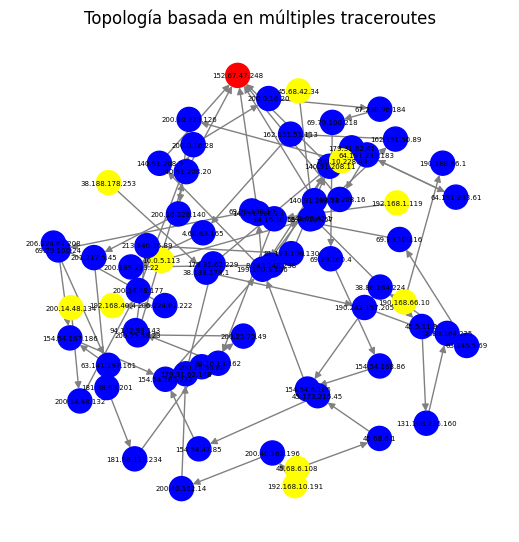

In [39]:
df_temp = df.sample(n=10)
#df_temp = df

G = nx.DiGraph()
for idx, row in df_temp.iterrows():
    dst = row['dst_addr']
    src = row['src_addr']
    trace = row['result']  # cada fila tiene un traceroute en formato JSON

    # Agrega el destino una sola vez, en rojo
    if not G.has_node(dst):
        G.add_node(dst, color='red')

    previous_ip = src
    if not G.has_node(src):
        G.add_node(src, color='yellow')
        
    for hop in trace:
        results = hop.get("result", [])
        ips = [r['from'] for r in results if 'from' in r]
        if not ips:
            continue
        current_ip = ips[0]
        if is_bogon(current_ip) == False:
            #continue
            # Si el nodo ya existe y es rojo, no lo sobrescribas
            if not G.has_node(current_ip):
                G.add_node(current_ip, color='blue')
    
            if previous_ip:
                G.add_edge(previous_ip, current_ip)
                previous_ip = current_ip

       

# Dibujar la red
plt.figure(figsize=(5,5))
#pos = nx.spring_layout(G, k=0.5)
#pos = nx.spectral_layout(G)
#if nx.check_planarity(G)[0]:
#    pos = nx.planar_layout(G,)
#    print('planar')
#else:
#pos = nx.spectral_layout(G)
pos = nx.spring_layout(G,k=0.5,center=[0,0])
#node_colors = [G.nodes[n]['color'] for n in G.nodes()]
node_colors = [G.nodes[n].get('color', 'gray') for n in G.nodes()]
nx.draw(G, pos, with_labels=True,node_color=node_colors,edge_color='gray', node_size=300, font_size=5, arrows=True)
plt.title("Topología basada en múltiples traceroutes")
plt.show()

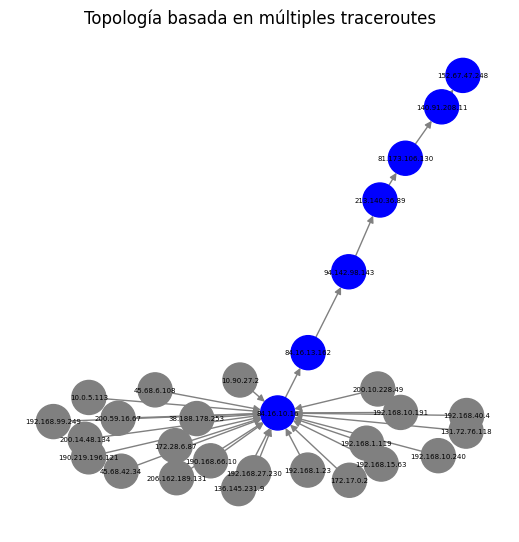

In [40]:
df_temp = df

# Crear un grafo dirigido
G = nx.DiGraph()


for idx,row in df_temp.iterrows():
    # Paso 1: Agregar el nodo inicial en rojo
    if not G.has_node(dst):
        #G.add_node(dst, color='red')
        G.add_node(row['dst_addr'], color='red')
    previous_ip = row['src_addr']
    for hop in trace:
        results = hop.get("result", [])
        # Extraer IPs válidas (a veces hay '*')
        ips = [r['from'] for r in results if 'from' in r]
        if not ips:
            continue
        current_ip = ips[0]  # Usamos la primera IP del hop
        
        if is_bogon(current_ip) == False:
            if previous_ip:
                # Añadir arista (enlace) al grafo
                G.add_node(current_ip,color='blue')
                G.add_edge(previous_ip, current_ip)
                previous_ip = current_ip  # Actualizar para el próximo salto

# Dibujar la red
plt.figure(figsize=(5, 5))
pos = nx.spring_layout(G, k=0.1)
#pos = nx.spectral_layout(G)
#if nx.check_planarity(G)[0]:
#    pos = nx.planar_layout(G,)
#    print('planar')
#else:
#    pos = nx.spectral_layout(G)

#node_colors = [G.nodes[n]['color'] for n in G.nodes()]
node_colors = [G.nodes[n].get('color', 'gray') for n in G.nodes()]
nx.draw(G, pos, with_labels=True,node_color=node_colors,edge_color='gray', node_size=600, font_size=5, arrows=True)
plt.title("Topología basada en múltiples traceroutes")
plt.show()


In [18]:
df.query("src_addr == '136.145.231.9' ")

,fw,mver,lts,endtime,dst_name,dst_addr,src_addr,proto,af,size,...,result,destination_ip_responded,msm_id,prb_id,timestamp,msm_name,from,type,group_id,stored_timestamp
21,5080,2.6.2,32,1752637131,152.67.47.248,152.67.47.248,136.145.231.9,ICMP,4,48,...,"[{'hop': 1, 'result': [{'from': '136.145.231.1...",True,117967529,20057,1752637128,Traceroute,136.145.231.9,traceroute,117967529,1752637132


In [20]:
print(f"src : {row['src_addr']} ")
for hop in trace:
        results = hop.get("result", [])
        # Extraer IPs válidas (a veces hay '*')
        ips = [r['from'] for r in results if 'from' in r]
        if not ips:
            continue
        current_ip = ips[0]  # Usamos la primera IP del hop
        
        if is_bogon(current_ip) :
            if previous_ip:
                # Añadir arista (enlace) al grafo
                #G.add_edge(previous_ip, current_ip)
                #previous_ip = current_ip  # Actualizar para el próximo salto
                print(f"it is a bogon: {current_ip} ")
        else:
            print(f"it is not a bogon: {current_ip} ")

src : 192.168.27.230 
it is a bogon: 192.168.15.1 
it is not a bogon: 201.1.224.4 
it is not a bogon: 152.255.193.203 
it is not a bogon: 200.25.56.18 
it is not a bogon: 200.25.51.64 
it is not a bogon: 200.25.51.134 
it is not a bogon: 200.25.58.23 
it is not a bogon: 140.91.208.33 
it is not a bogon: 152.67.47.248 


In [21]:
import pandas as pd
import plotly.graph_objects as go
from collections import Counter


# Paso 1: Construir conjunto de nodos y contador de enlaces
all_nodes = set()
link_counter = Counter()

for trace in df["result"]:
    previous_ip = None
    for hop in trace:
        results = hop.get("result", [])
        ips = [r['from'] for r in results if 'from' in r]
        if not ips:
            continue
        current_ip = ips[0]
        all_nodes.add(current_ip)
        if previous_ip:
            link_counter[(previous_ip, current_ip)] += 1
        previous_ip = current_ip

# Paso 2: Indexar nodos
node_list = list(all_nodes)
node_index = {ip: i for i, ip in enumerate(node_list)}

# Paso 3: Construir listas para Sankey
source = [node_index[src] for src, dst in link_counter]
target = [node_index[dst] for src, dst in link_counter]
value  = [count for (src, dst), count in link_counter.items()]

# Paso 4: Crear gráfico Sankey
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=node_list,
        color="skyblue"
    ),
    link=dict(
        source=source,
        target=target,
        value=value,
        color="lightgray"
    )
)])

fig.update_layout(title_text="Topología de Traceroutes - Gráfico Sankey", font_size=10)
fig.show()


In [23]:
import pandas as pd
import plotly.graph_objects as go
from collections import Counter
import ipaddress

# Función para verificar si la IP es privada o reservada (bogon)
def is_bogon(ip):
    """Check if an IP address is part of a bogon network."""
    bogon_networks = [
        ipaddress.ip_network('0.0.0.0/8'),       # "This" Network
        ipaddress.ip_network('10.0.0.0/8'),      # Private-Use Networks
        ipaddress.ip_network('100.64.0.0/10'),   # Shared Address Space
        ipaddress.ip_network('127.0.0.0/8'),     # Loopback
        ipaddress.ip_network('169.254.0.0/16'),  # Link Local
        ipaddress.ip_network('172.16.0.0/12'),   # Private-Use Networks
        ipaddress.ip_network('192.0.0.0/24'),    # IETF Protocol Assignments
        ipaddress.ip_network('192.0.2.0/24'),    # TEST-NET-1
        ipaddress.ip_network('192.168.0.0/16'),  # Private-Use Networks
        ipaddress.ip_network('198.18.0.0/15'),   # Benchmark Testing
        ipaddress.ip_network('198.51.100.0/24'), # TEST-NET-2
        ipaddress.ip_network('203.0.113.0/24'),  # TEST-NET-3
        ipaddress.ip_network('224.0.0.0/4'),     # Multicast
        ipaddress.ip_network('240.0.0.0/4'),     # Reserved
        ipaddress.ip_network('255.255.255.255/32') # Broadcast
    ]
    try:
        ip_addr = ipaddress.ip_address(ip)
    except ValueError:
        return True  # Si no es una IP válida, lo tratamos como bogon

    return any(ip_addr in network for network in bogon_networks)

# ============================
# Construir nodos y enlaces
# ============================
all_nodes = set()
link_counter = Counter()

for trace in df["result"]:
    previous_ip = None
    for hop in trace:
        results = hop.get("result", [])
        # Tomar la primera IP pública que aparezca en este hop
        ips = [r['from'] for r in results if 'from' in r and not is_bogon(r['from'])]
        if not ips:
            continue
        current_ip = ips[0]
        all_nodes.add(current_ip)
        if previous_ip:
            link_counter[(previous_ip, current_ip)] += 1
        previous_ip = current_ip

# ============================
# Indexar nodos
# ============================
node_list = list(all_nodes)
node_index = {ip: i for i, ip in enumerate(node_list)}

# ============================
# Construir listas para Sankey
# ============================
source = [node_index[src] for src, dst in link_counter]
target = [node_index[dst] for src, dst in link_counter]
value  = [count for (src, dst), count in link_counter.items()]

# ============================
# Crear gráfico Sankey
# ============================
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=node_list,
        color="skyblue"
    ),
    link=dict(
        source=source,
        target=target,
        value=value,
        color="lightgray"
    )
)])

fig.update_layout(title_text="Topología de Traceroutes (IPs Pública) - Sankey", font_size=10)
fig.show()


In [24]:
import plotly.graph_objects as go
from collections import Counter, defaultdict
import numpy as np


#df_temp = df.sample(n=15)
df_temp = df

# Construcción de nodos y enlaces con conteo y acumulación de RTTs
link_counter = Counter()
rtt_map = defaultdict(list)
nodes_set = set()

for trace in df_temp["result"]:
    previous_ip = None
    for hop in trace:
        results = hop.get("result", [])
        ips_rtt = [(r['from'], r['rtt']) for r in results if 'from' in r and 'rtt' in r]
        if not ips_rtt:
            continue
        current_ip = ips_rtt[0][0]
        rtts = [rtt for _, rtt in ips_rtt]

        nodes_set.add(current_ip)
        if previous_ip:
            link_counter[(previous_ip, current_ip)] += 1
            rtt_map[(previous_ip, current_ip)].extend(rtts)
        previous_ip = current_ip

# Crear listas ordenadas para nodos
nodes_list = list(nodes_set)
node_index = {node: i for i, node in enumerate(nodes_list)}

# Función para colorear por RTT promedio
def rtt_to_color(rtt):
    if rtt < 50:
        return "green"
    elif rtt < 150:
        return "orange"
    else:
        return "red"

# Preparar datos para Sankey
source2 = []
target2 = []
value2 = []
link_colors = []

for (src, dst), count in link_counter.items():
    avg_rtt = np.mean(rtt_map[(src, dst)])
    source2.append(node_index[src])
    target2.append(node_index[dst])
    value2.append(count)
    link_colors.append(rtt_to_color(avg_rtt))

# Crear figura Sankey
fig = go.Figure(data=[go.Sankey(
    node = dict(
        pad = 15,
        thickness = 20,
        line = dict(color = "black", width = 0.1),
        label = nodes_list,
        color = "blue"
    ),
    link = dict(
        source = source2,
        target = target2,
        value = value2,
        color = link_colors
    )
)])

fig.update_layout(title_text="Traceroutes Sankey Diagram con RTT by Time on each Hop", font_size=6)
fig.show()


In [26]:
import pandas as pd
import plotly.graph_objects as go
from collections import Counter, defaultdict
import numpy as np
import ipaddress

# === Función para filtrar IPs privadas o reservadas ===
def is_bogon(ip):
    bogon_networks = [
        ipaddress.ip_network('0.0.0.0/8'),
        ipaddress.ip_network('10.0.0.0/8'),
        ipaddress.ip_network('100.64.0.0/10'),
        ipaddress.ip_network('127.0.0.0/8'),
        ipaddress.ip_network('169.254.0.0/16'),
        ipaddress.ip_network('172.16.0.0/12'),
        ipaddress.ip_network('192.0.0.0/24'),
        ipaddress.ip_network('192.0.2.0/24'),
        ipaddress.ip_network('192.168.0.0/16'),
        ipaddress.ip_network('198.18.0.0/15'),
        ipaddress.ip_network('198.51.100.0/24'),
        ipaddress.ip_network('203.0.113.0/24'),
        ipaddress.ip_network('224.0.0.0/4'),
        ipaddress.ip_network('240.0.0.0/4'),
        ipaddress.ip_network('255.255.255.255/32')
    ]
    try:
        ip_addr = ipaddress.ip_address(ip)
    except ValueError:
        return True
    return any(ip_addr in network for network in bogon_networks)

# === Filtrado y construcción de enlaces con RTT ===
df_temp = df  

link_counter = Counter()
rtt_map = defaultdict(list)
nodes_set = set()

for trace in df_temp["result"]:
    previous_ip = None
    for hop in trace:
        results = hop.get("result", [])
        # Filtrar solo IPs públicas con RTT
        ips_rtt = [(r['from'], r['rtt']) for r in results 
                   if 'from' in r and 'rtt' in r and not is_bogon(r['from'])]
        if not ips_rtt:
            continue
        current_ip = ips_rtt[0][0]
        rtts = [rtt for _, rtt in ips_rtt]

        nodes_set.add(current_ip)
        if previous_ip:
            link_counter[(previous_ip, current_ip)] += 1
            rtt_map[(previous_ip, current_ip)].extend(rtts)
        previous_ip = current_ip

# === Indexar nodos ===
nodes_list = list(nodes_set)
node_index = {node: i for i, node in enumerate(nodes_list)}

# === Función para colorear enlaces según RTT promedio ===
def rtt_to_color(rtt):
    if rtt < 50:
        return "green"
    elif rtt < 150:
        return "orange"
    else:
        return "red"

# === Preparar datos para Sankey ===
source2 = []
target2 = []
value2 = []
link_colors = []

for (src, dst), count in link_counter.items():
    avg_rtt = np.mean(rtt_map[(src, dst)])
    source2.append(node_index[src])
    target2.append(node_index[dst])
    value2.append(count)
    link_colors.append(rtt_to_color(avg_rtt))

# === Crear figura Sankey ===
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.1),
        label=nodes_list,
        color="blue"
    ),
    link=dict(
        source=source2,
        target=target2,
        value=value2,
        color=link_colors
    )
)])

fig.update_layout(title_text="Traceroutes Sankey Diagram Just Public IPs", font_size=6)
fig.show()
